In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [2]:
import tensorflow as tf
import keras as k
from keras.layers import Dense,Input,Flatten
from keras.models import Model

Using TensorFlow backend.


In [3]:
encoding_dim=32
input_img=Input(shape=(784,))
encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)

In [4]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [5]:
train_df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train=train_df[train_df.columns[1:]]
y_train=train_df['label']

In [8]:
x_test=test_df[test_df.columns[1:]]
y_test=test_df['label']

In [9]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
#x_train=x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
#x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))
print('x_train',x_train.shape)
print(x_test.shape)

x_train (60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train,x_train,
               epochs=20,
               batch_size=250,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.5291 - val_loss: 0.4536
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.4237 - val_loss: 0.4031
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3945 - val_loss: 0.3840
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3771 - val_loss: 0.3689
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3635 - val_loss: 0.3568
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3526 - val_loss: 0.3471
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3439 - val_loss: 0.3394
Epoch 8/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3369 - val_loss: 0.3331
Epoch 9/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3313 - val_loss: 0.3281
Epoch

In [11]:
autoencoder.evaluate(x_test,x_test)

10000/10000 [==============================] - 0s 39us/step


0.30637601165771483

In [12]:
autoencoder.predict(x_test)

array([[1.76135256e-06, 1.99828469e-06, 5.07476625e-06, ...,
        9.46487940e-04, 5.88324445e-04, 4.78317406e-06],
       [8.22127390e-07, 1.75464479e-07, 9.49444541e-07, ...,
        1.11728492e-04, 9.86128143e-05, 9.87698286e-07],
       [3.71507742e-03, 4.88653453e-03, 3.38082248e-03, ...,
        5.96589260e-02, 2.34320536e-02, 2.68168957e-03],
       ...,
       [3.23060317e-06, 8.86082762e-06, 5.16123291e-05, ...,
        1.19147524e-02, 6.28898793e-04, 9.69241810e-05],
       [5.86634360e-06, 1.06076441e-05, 1.61611279e-05, ...,
        4.08820286e-02, 2.95225345e-03, 1.60342170e-05],
       [2.47373549e-07, 1.14769506e-07, 8.18374133e-07, ...,
        2.43147044e-03, 7.82955321e-05, 2.09639893e-07]], dtype=float32)

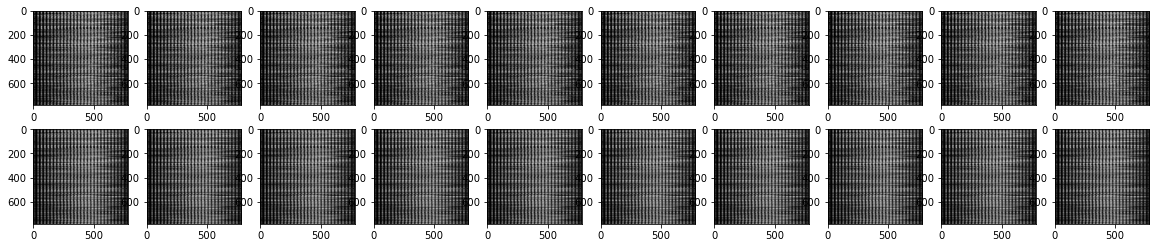

In [13]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range (n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[:784])
    plt.gray()
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(autoencoder.predict(x_test)[:784])
    plt.gray()
plt.show()